In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


# 1| Reading and preprocessing data

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords

In [3]:
col_text = 'im getting on borderlands and i will murder you all ,'

In [4]:
df_train = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")

In [5]:
df_train=df_train.drop("2401",axis=1)
df_train=df_train.drop("Borderlands",axis=1)
df_train

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [6]:
def clean_text(text):
    if isinstance(text, str):
        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Remove special characters
        str_text = re.sub(r'[^\w\s]', '', text)

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = str_text.lower().split()
        str_text = ' '.join([word for word in tokens if word not in stop_words])
        return str_text
    else:
        return text

In [7]:
df_train["Text"] = df_train[col_text].apply(clean_text)

In [8]:
df_train_POS = df_train[df_train["Positive"] == "Positive"]
df_train_NEG = df_train[df_train["Positive"] == "Negative"]
df_train_NEU = df_train[df_train["Positive"] == "Neutral"]

In [9]:
df_train_POS

,Positive,"im getting on borderlands and i will murder you all ,",Text
0,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...
74676,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


In [10]:
df_train_NEG

,Positive,"im getting on borderlands and i will murder you all ,",Text
23,Negative,the biggest dissappoinment in my life came out...,biggest dissappoinment life came year ago fuck...
24,Negative,The biggest disappointment of my life came a y...,biggest disappointment life came year ago
25,Negative,The biggest disappointment of my life came a y...,biggest disappointment life came year ago
26,Negative,the biggest dissappoinment in my life coming o...,biggest dissappoinment life coming year ago fu...
27,Negative,For the biggest male dissappoinment in my life...,biggest male dissappoinment life came hanging ...
...,...,...,...
74664,Negative,Nvidia really delayed the 3070 by 2 weeks.,nvidia really delayed weeks
74665,Negative,Nvidia did delay by 3070 2 weeks.,nvidia delay weeks
74666,Negative,Nvidia really delayed the 3070 several weeks.,nvidia really delayed several weeks
74667,Negative,Nvidia really only delayed the 3070 2 flight w...,nvidia really delayed flight weeks


In [11]:
df_train_NEU

,Positive,"im getting on borderlands and i will murder you all ,",Text
11,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",rockhard la varlope rare powerful handsome jac...
12,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",rockhard la varlope rare powerful handsome jac...
13,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",rockhard la varlope rare powerful handsome jac...
14,Neutral,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",rockhard la vita rare powerful handsome jackpo...
15,Neutral,"Live Rock - Hard music La la Varlope, RARE & t...",live rock hard music la la varlope rare powerf...
...,...,...,...
74658,Neutral,"Nvidia plans to release its 2017 ""Crypto Craze...",nvidia plans release crypto craze documentary ...
74659,Neutral,"Nvidia does not want to give up its ""cryptoins...",nvidia want give cryptoinsanity doxmaxbitcc nv...
74660,Neutral,Nvidia doesn’t intend to give away its 2017 ad...,nvidia doesnt intend give away ad craze docs m...
74661,Neutral,Nvidia therefore doesn ’ t want to give up its...,nvidia therefore want give crypto craze docs m...


In [12]:
df_train_POS = df_train_POS.sample(1000)
df_train_NEG = df_train_NEG.sample(1000)
df_train_NEU = df_train_NEU.sample(2000)

In [13]:
df_train_POS

,Positive,"im getting on borderlands and i will murder you all ,",Text
52521,Positive,Red Dead Redemption 2 II is one of the 13 best...,red dead redemption ii one best damn games ive...
9460,Positive,i want gold.,want gold
902,Positive,Atleast I have Borderlands to match me up :(,atleast borderlands match
51833,Positive,this is a excellent time to actually go try & ...,excellent time actually go try finish red dead...
55758,Positive,Call of Duty: WARZONE is definitely on the top...,call duty warzone definitely top list fps game...
...,...,...,...
21739,Positive,It's going to be a beautiful game! Are you rea...,going beautiful game ready hard _ legion
40369,Positive,"almost done YES, tomorrow we can finish our go...",almost done yes tomorrow finish goal finally k...
38900,Positive,Good stream tonight. Jumped back into Arena af...,good stream tonight jumped back arena couple b...
47358,Positive,"""I recommend the product to anyone with minima...",recommend product anyone minimal skills instal...


In [14]:
df_train_NEG

,Positive,"im getting on borderlands and i will murder you all ,",Text
44354,Negative,"Thanks RhandlerR , we’re all stuck at home wit...",thanks rhandlerr stuck home wifi instead helpi...
46516,Negative,Hey @verizonfios @verizon because Why not my i...,hey verizonfios verizon internet speed andmbps...
49079,Negative,This stupid nacho is playing like FIFA players,stupid nacho playing like fifa players
54530,Negative,@Treyarch Call of Duty Black Ops 3 is the wors...,treyarch call duty black ops worst fighting ga...
54341,Negative,Garbage ass @CallofDuty servers lagged me out ...,garbage ass callofduty servers lagged kills so...
...,...,...,...
72211,Negative,@ GhostRecon the problem I discovered has some...,ghostrecon problem discovered something erejon...
12345,Negative,@2K 2k20 worst game is ever scored missed 20 l...,k k worst game ever scored missed layups misse...
22028,Negative,Filthy on multiple levels,filthy multiple levels
35270,Negative,"Am I completely missing something, or should A...",completely missing something apple news mac vi...


In [15]:
df_train_NEU

,Positive,"im getting on borderlands and i will murder you all ,",Text
1477,Neutral,A full moon turned around? Guy with a revolver...,full moon turned around guy revolver guy whist...
72539,Neutral,Nvidia makes Shield TV’s impressive 4K upscali...,nvidia makes shield tvs impressive k upscaling...
45252,Neutral,You just sealed your fate with this historical...,sealed fate historically stupid move verizon t...
74377,Neutral,Don't miss these exciting,dont miss exciting
65436,Neutral,Johnson & Johnson halted its,johnson johnson halted
...,...,...,...
52972,Neutral,reason Rockstar won’t release Captain Dead IV ...,reason rockstar wont release captain dead iv z...
47635,Neutral,Home Depot saw this massive turtle cutter pic....,home depot saw massive turtle cutter picfr fngqdn
41905,Neutral,Russian bots exacerbate Battlefield 1,russian bots exacerbate battlefield
45610,Neutral,"IN OUTAGE: Verizon, W-Mobile, Sprint Discover ...",outage verizon wmobile sprint discover att fol...


In [16]:
df_train_POS.shape, df_train_NEG.shape, df_train_NEU.shape

((1000, 3), (1000, 3), (2000, 3))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train_NEU_1, df_train_NEU_2 = train_test_split(df_train_NEU, test_size=0.5)

In [19]:
df_train_NEU_1.shape, df_train_NEU_2.shape

((1000, 3), (1000, 3))

# Positive

In [20]:
df_train_POS_text = np.array(df_train_POS["Text"])
df_train_POS_target = np.array(df_train_POS["Positive"])

In [21]:
df_train_POS_text[0]

'red dead redemption ii one best damn games ive actually ever played rookie period'

# Negative

In [22]:
df_train_NEG_text = np.array(df_train_NEG["Text"])
df_train_NEG_target = np.array(df_train_NEG["Positive"])

In [23]:
df_train_NEG_text[0]

'thanks rhandlerr stuck home wifi instead helping bills two people asinine btw give us additional data dont need pictwittercommxciywyusv'

# Neutral 1 and 2

In [24]:
df_train_NEU_1_text = np.array(df_train_NEU_1["Text"])
df_train_NEU_1_target = np.array(df_train_NEU_1["Positive"])
df_train_NEU_2_text = np.array(df_train_NEU_2["Text"])
df_train_NEU_2_target = np.array(df_train_NEU_2["Positive"])

In [25]:
df_train_NEU_text = np.concatenate([df_train_NEU_1_text,df_train_NEU_2_text])
df_train_NEU_target = np.concatenate([df_train_NEU_1_target,df_train_NEU_2_target])

In [26]:
df_train_NEU_text.shape, df_train_NEU_target

((2000,),
 array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
        'Neutral'], dtype=object))

In [27]:
df_train_text = np.concatenate([df_train_POS_text,df_train_NEG_text, df_train_NEU_text])
df_train_target = np.concatenate([df_train_POS_target,df_train_NEG_target, df_train_NEU_target])

df_train_text.shape,df_train_target.shape

((4000,), (4000,))

In [28]:
df_train

,Positive,"im getting on borderlands and i will murder you all ,",Text
0,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...
74676,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


# Transfer to one hot vector

In [29]:
df_train_target

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder()

In [32]:
df_train_target_reshaped = df_train_target.reshape(-1,1)

In [33]:
onehot_encoded = encoder.fit_transform(df_train_target_reshaped)
onehot_encoded_array = onehot_encoded.toarray().astype(int)
onehot_encoded_array

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

# Split data to training set and testing set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train_text, onehot_encoded_array, test_size = 0.3)

In [35]:
X_train,X_test

(array(['tf r u say moved',
        'gopunk new book exposes pot kettle black confront evildoers partisan politics destroying america insist digest pages open mindsjesus one step sinavailable amazon amazoncomdp httpstcolgfjefu',
        'wow new upcoming update lots splinter cell new items coming including upgrade im excited ai teammates also coming update excited check patch ghostreconubisoftcomgameengbnew',
        ...,
        'find funny took call duty bring gem lecture attention highly recommend looking youtube minutes long pictwittercomwowpiso',
        'lookunk sexy sparkly art',
        'check item got wristwraps recording original insatiable maw'],
       dtype=object),
 array(['microsofttodo app system sucks wunderlist superior microsoft thanks nothing',
        'oh wow', 'let know fix ugly trash copy paste gameplay', ...,
        'rainbowgame im going list games order happened pinger hacker pinger pinger thrower hacker thrower hacker pinger ive lost games row season ever sea

# Callback function

In [36]:
import tensorflow as tf

2024-02-18 19:59:17.277311: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:59:17.277412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:59:17.406653: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [38]:
check_point = tf.keras.callbacks.ModelCheckpoint(
    '/kaggle/working/check_point.hdf5',
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch"
)

In [39]:
def scheduler(epoch, lr):
    if epoch < 12:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

In [40]:
LR_Scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Model

In [41]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [42]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [43]:
def build_model():
    bert_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name='text_bert')

#     # Bert Embedding 
    preprocessed_text = bert_preprocess(bert_input)
    outputs = bert_encoder(preprocessed_text)
    pooled_output = tf.keras.layers.concatenate(
        tuple([outputs['encoder_outputs'][i] for i in range(-4, 0)]), 
        name = 'last_4_hidden_states',
        axis = -1
    )[:, 0, :]
    pooled_output = tf.keras.layers.LayerNormalization()(pooled_output)
    
    print(pooled_output.shape)
    Dense = tf.keras.layers.Dropout(0.5)(pooled_output)
    Dense = tf.keras.layers.Dense(768, activation='relu')(Dense)
    Dense = tf.keras.layers.Dropout(0.5)(Dense)
    classifer = tf.keras.layers.Dense(3,activation='softmax', name="output")(Dense)
    model = tf.keras.models.Model(inputs = [bert_input], outputs = [classifer])
    return model

In [44]:
model = build_model()

(None, 3072)


In [45]:
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_bert (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text_bert[0][0]']           
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [46]:
s = 0
for i in X_train:
    print(i)
    s += 1
    if s == 5 : break

tf r u say moved
gopunk new book exposes pot kettle black confront evildoers partisan politics destroying america insist digest pages open mindsjesus one step sinavailable amazon amazoncomdp httpstcolgfjefu
wow new upcoming update lots splinter cell new items coming including upgrade im excited ai teammates also coming update excited check patch ghostreconubisoftcomgameengbnew
one og nctzen azaxdeh decided shop local discount support
remember watching woman live wondering choreographed dance four women bloody incredible ever want three minutes goosebumps watch


In [47]:
# X_train = pd.DataFrame(X_train)
len(X_train)

2800

In [48]:
X_train = np.array([str(i) for i in X_train])

In [49]:
X_test = np.array([str(i) for i in X_test])

In [50]:
len(X_train)

2800

In [51]:
h = model.fit(X_train, y_train, 
              epochs=100, 
              validation_data=(X_test, y_test),
              callbacks = [early_stopping,check_point])

Epoch 1/100


I0000 00:00:1708286401.622502      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 [==============================] - ETA: 0s - loss: 1.9760 - accuracy: 0.3914

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 39s 304ms/step - loss: 1.9760 - accuracy: 0.3914 - val_loss: 1.1531 - val_accuracy: 0.4892
Epoch 2/100
88/88 [==============================] - 26s 296ms/step - loss: 1.7926 - accuracy: 0.4132 - val_loss: 1.0940 - val_accuracy: 0.5067
Epoch 3/100
88/88 [==============================] - 26s 296ms/step - loss: 1.7489 - accuracy: 0.4214 - val_loss: 1.0695 - val_accuracy: 0.5167
Epoch 4/100
88/88 [==============================] - 26s 296ms/step - loss: 1.6217 - accuracy: 0.4429 - val_loss: 1.0102 - val_accuracy: 0.5233
Epoch 5/100
88/88 [==============================] - 26s 295ms/step - loss: 1.5810 - accuracy: 0.4450 - val_loss: 0.9643 - val_accuracy: 0.5500
Epoch 6/100
88/88 [==============================] - 26s 294ms/step - loss: 1.4477 - accuracy: 0.4579 - val_loss: 0.9609 - val_accuracy: 0.5558
Epoch 7/100
88/88 [==============================] - 26s 294ms/step - loss: 1.4590 - accuracy: 0.4611 - val_loss: 0.9492 - val_accuracy: 0.5533
Epoc

In [52]:
x = 0.213
print(type(x))
x = str(x)
print(type(x))

<class 'float'>
<class 'str'>


# F1 score

In [53]:
from sklearn.metrics import classification_report

(0.0, 1.0)

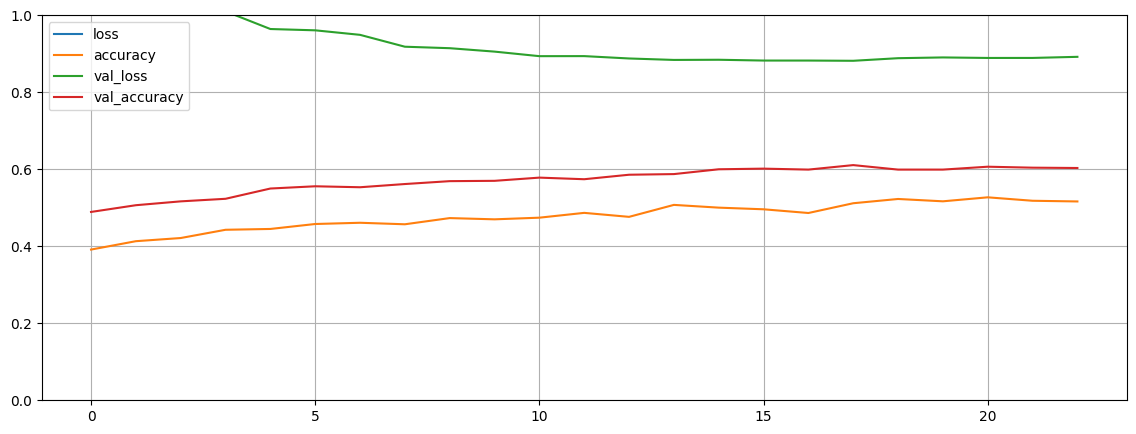

In [54]:
import matplotlib.pyplot as plt
pd.DataFrame(h.history).plot(figsize = (14,5))
plt.grid(True)
plt.gca().set_ylim(0 , 1)

In [55]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 7s 195ms/step - loss: 0.8921 - accuracy: 0.6033


[0.8920716643333435, 0.6033333539962769]

In [56]:
X_test[0], y_test[0]

('microsofttodo app system sucks wunderlist superior microsoft thanks nothing',
 array([1, 0, 0]))

In [57]:
y_pred = model.predict(X_test)
y_pred[0]

38/38 [==============================] - 8s 194ms/step


array([0.33059722, 0.40971828, 0.25968453], dtype=float32)

In [58]:
y_pred = np.round(y_pred)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.18      0.29       319
           1       0.72      0.53      0.61       585
           2       0.66      0.21      0.31       296

   micro avg       0.71      0.36      0.47      1200
   macro avg       0.71      0.30      0.40      1200
weighted avg       0.71      0.36      0.45      1200
 samples avg       0.36      0.36      0.36      1200



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
